#### Question 1

In [3]:
## Load Required Pacackages
# Import pandas for reading datasets
import pandas as pd
# Import numpy for any computation-like processes
import numpy as np
# Import matplotlib for any graphs
import matplotlib.pyplot as plt
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Import grid search 
from sklearn.model_selection import GridSearchCV
# Import simple imputer 
from sklearn.impute import SimpleImputer
# Import MinMax scaler for normalization
from sklearn.preprocessing import MinMaxScaler
# Import pipline
from sklearn.pipeline import Pipeline
# Import r2_score for evaluting regression
from sklearn.metrics import r2_score
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Import KNN regressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_breast_cancer

In [18]:
# Read breast cancer dataset
breastcancer = pd.read_csv('data/data.csv')
# View head
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
breastcancer['diagnosis'] = breastcancer.diagnosis.replace('M', 1)

In [23]:
breastcancer['diagnosis'] = breastcancer.diagnosis.replace('B', 0)



In [31]:
breastcancer.diagnosis = breastcancer.diagnosis.astype('int')

In [32]:
# Show dataset info
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
# Check outcome distrbution
breastcancer.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [34]:
# Split into predictiors and outcome
X = breastcancer.drop('diagnosis', axis = 1)
y = breastcancer['diagnosis']

In [35]:
# Split into training and testing subsets with stratification over y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [36]:
# Intiate a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
# Fit over training data
knn.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
# Print overall accuracy
knn.score(X_test, y_test)

0.9298245614035088

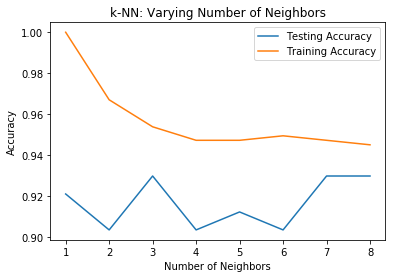

In [32]:
# Let's implement Elbow method
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [35]:
# Let's implement gridsearch for choosing best distance metric
# Metrics list to search
metrics = ['cosine', 'manhattan', 'euclidean']

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_neighbors":list(range(1,9)),
              "metric": metrics}

# Instantiate grid search object
knn_gs = GridSearchCV(knn, param_dist, cv=5)

In [36]:
# Fit the GridSearchCV object
knn_gs.fit(X, y)


C:\Users\Ahmed.Abuelkhir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=8, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['cosine', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_gs.best_params_))
print("Best score is {}".format(knn_gs.best_score_))

Tuned KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 6}
Best score is 0.9367311072056239


#### Question 2 

In [1]:
# Read dataset
bankdata = pd.read_csv('data/bill_authentication.csv')
# View the head
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Show dataset info
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [99]:
# Split the data into predictors and output
X = bankdata.drop('Class', axis = 1)
y = bankdata['Class']

In [110]:
# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [111]:
# Import SVC classifier 
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', gamma='scale')
# Fit the training data
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
# Use classifier to make predictions
y_pred = svclassifier.predict(X_test)

In [113]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[191   4]
 [  1 147]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       195
           1       0.97      0.99      0.98       148

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [114]:
# Let's try different kernels with GridSearch
param_dist = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
             'C': [0.01, 0.1, 0.5, 1, 3, 7]}
# Intiate GridSearch
svm_gs = GridSearchCV(svclassifier, param_dist, cv=5)

In [115]:
svm_gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 7],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(svm_gs.best_params_))
print("Best score is {}".format(svm_gs.best_score_))

Tuned SVM Parameters: {'C': 3, 'kernel': 'rbf'}
Best score is 1.0
